In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding = "latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
len(df)

5572

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df[['v1', 'v2']]

In [7]:
#df.head()

In [8]:
df = df.rename(columns = {'v1': 'label', 'v2': 'text'})

In [9]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label'] == 'ham']
ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [12]:
spam = df[df['label'] == 'spam']
spam.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [13]:
ham.shape, spam.shape

((4825, 2), (747, 2))

In [14]:
# Balancing the data by taking same number of 'ham' and 'spam' messages to avoid biased predictions.

ham = ham.sample(spam.shape[0])  # This selects random data from 'ham' which is of the shape of 'spam'.

In [15]:
ham.shape

(747, 2)

In [16]:
data = ham.append(spam, ignore_index=True)
data.head()

,label,text
0,ham,I cant pick the phone right now. Pls send a me...
1,ham,I know that my friend already told that.
2,ham,"sry can't talk on phone, with parents"
3,ham,Dont think so. It turns off like randomlly wit...
4,ham,Honeybee Said: *I'm d Sweetest in d World* God...


In [17]:
data['char_length'] = data['text'].str.len()

In [18]:
data.head()

,label,text,char_length
0,ham,I cant pick the phone right now. Pls send a me...,51
1,ham,I know that my friend already told that.,40
2,ham,"sry can't talk on phone, with parents",37
3,ham,Dont think so. It turns off like randomlly wit...,65
4,ham,Honeybee Said: *I'm d Sweetest in d World* God...,158


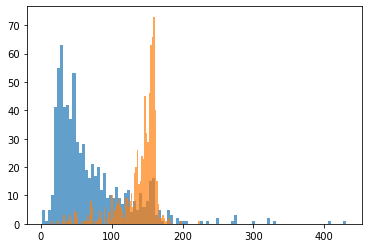

In [19]:
plt.hist(data[data['label'] == 'ham']['char_length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['char_length'], bins = 100, alpha = 0.7)

plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['label'])

In [22]:
X_train[0], X_train[1128]

('I cant pick the phone right now. Pls send a message',
 'U\x89Ûªve Bin Awarded å£50 to Play 4 Instant Cash. Call 08715203028 To Claim. EVERY 9th Player Wins Min å£50-å£500. OptOut 08718727870')

In [23]:
y_train[0], y_train[1128]

('ham', 'spam')

In [24]:
X_train.shape

(1045,)

### Creating Bag of words

In [25]:
vector = TfidfVectorizer()

In [26]:
X_train = vector.fit_transform(X_train)

In [27]:
X_train.shape

(1045, 3741)

In [28]:
X_train

<1045x3741 sparse matrix of type '<class 'numpy.float64'>'
	with 17566 stored elements in Compressed Sparse Row format>

In [29]:
1045*3680

3845600

### Pipeline and RF

In [30]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators = 100, n_jobs = -1))])

In [31]:
# clf.fit(X_train, y_train)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['label'])

In [33]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [34]:
y_predict = clf.predict(X_test)

In [35]:
confusion_matrix(y_test, y_predict)

array([[223,   2],
       [ 27, 197]], dtype=int64)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [37]:
accuracy_score(y_test, y_predict)

0.9354120267260579

In [38]:
clf.predict(['hey, how are you? wannna hangout'])

array(['ham'], dtype=object)

In [39]:
clf.predict(['this is a spam message'])

array(['ham'], dtype=object)

In [40]:
clf.predict(['free spam classifier for u.. download it now.. from this link'])

array(['ham'], dtype=object)

In [41]:
clf.predict(['got FREE movie tickets... go watch it'])

array(['ham'], dtype=object)

In [42]:
clf.predict(['click here to get ur free disneyland tickets.. '])

array(['ham'], dtype=object)

### Pipeline and SVM

In [43]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [44]:
# clf.fit(X_train, y_train)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['label'])

In [46]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [47]:
y_predict = clf.predict(X_test)

In [48]:
confusion_matrix(y_test, y_predict)

array([[215,  10],
       [ 17, 207]], dtype=int64)

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.94       225
        spam       0.95      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [50]:
accuracy_score(y_test, y_predict)

0.9398663697104677

In [51]:
clf.predict(['this is a spam message'])

array(['ham'], dtype=object)

In [52]:
clf.predict(['click here to get ur free disneyland tickets.. '])

array(['spam'], dtype=object)

In [53]:
clf.predict(['msg me whn free,... free free'])

array(['spam'], dtype=object)

In [54]:
clf.predict(['got FREE movie tickets... go watch it'])

array(['ham'], dtype=object)

In [55]:
clf.predict(['free spam classifier for u.. download it now.. from this link'])

array(['spam'], dtype=object)